In [1]:
from matplotlib.colors import LogNorm

import jax.numpy as jnp

import matplotlib.pyplot as plt


In [2]:
losses = jnp.empty((4,11_000_000), dtype=jnp.float32)
for i, L in enumerate([3, 5, 7, 9]):
    losses = losses.at[i,:].set(jnp.concat(
        [
            jnp.load(f"data/loss_CNN-G-{L}.npy"),
            jnp.load(f"data/loss_CNN-B-{L}.npy"),
            jnp.load(f"data/loss_CNN-B-{L}-Specialized.npy"),
        ]
    ))
losses

Array([[5.0343537e-01, 5.2657676e-01, 5.1854610e-01, ..., 9.1421790e-04,
        5.1871186e-05, 6.6056123e-06],
       [7.1285254e-01, 6.4756441e-01, 5.1729620e-01, ..., 3.8205699e-06,
        4.8613828e-08, 6.8589588e-06],
       [8.9736128e-01, 8.8580054e-01, 7.5421590e-01, ..., 1.2525721e-06,
        1.7756933e-05, 1.1117388e-06],
       [1.0191190e+00, 8.8191199e-01, 9.7963655e-01, ..., 2.8165127e-03,
        2.5622249e-02, 5.9404641e-07]], dtype=float32)

/tmp/ipykernel_129212/3944889637.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


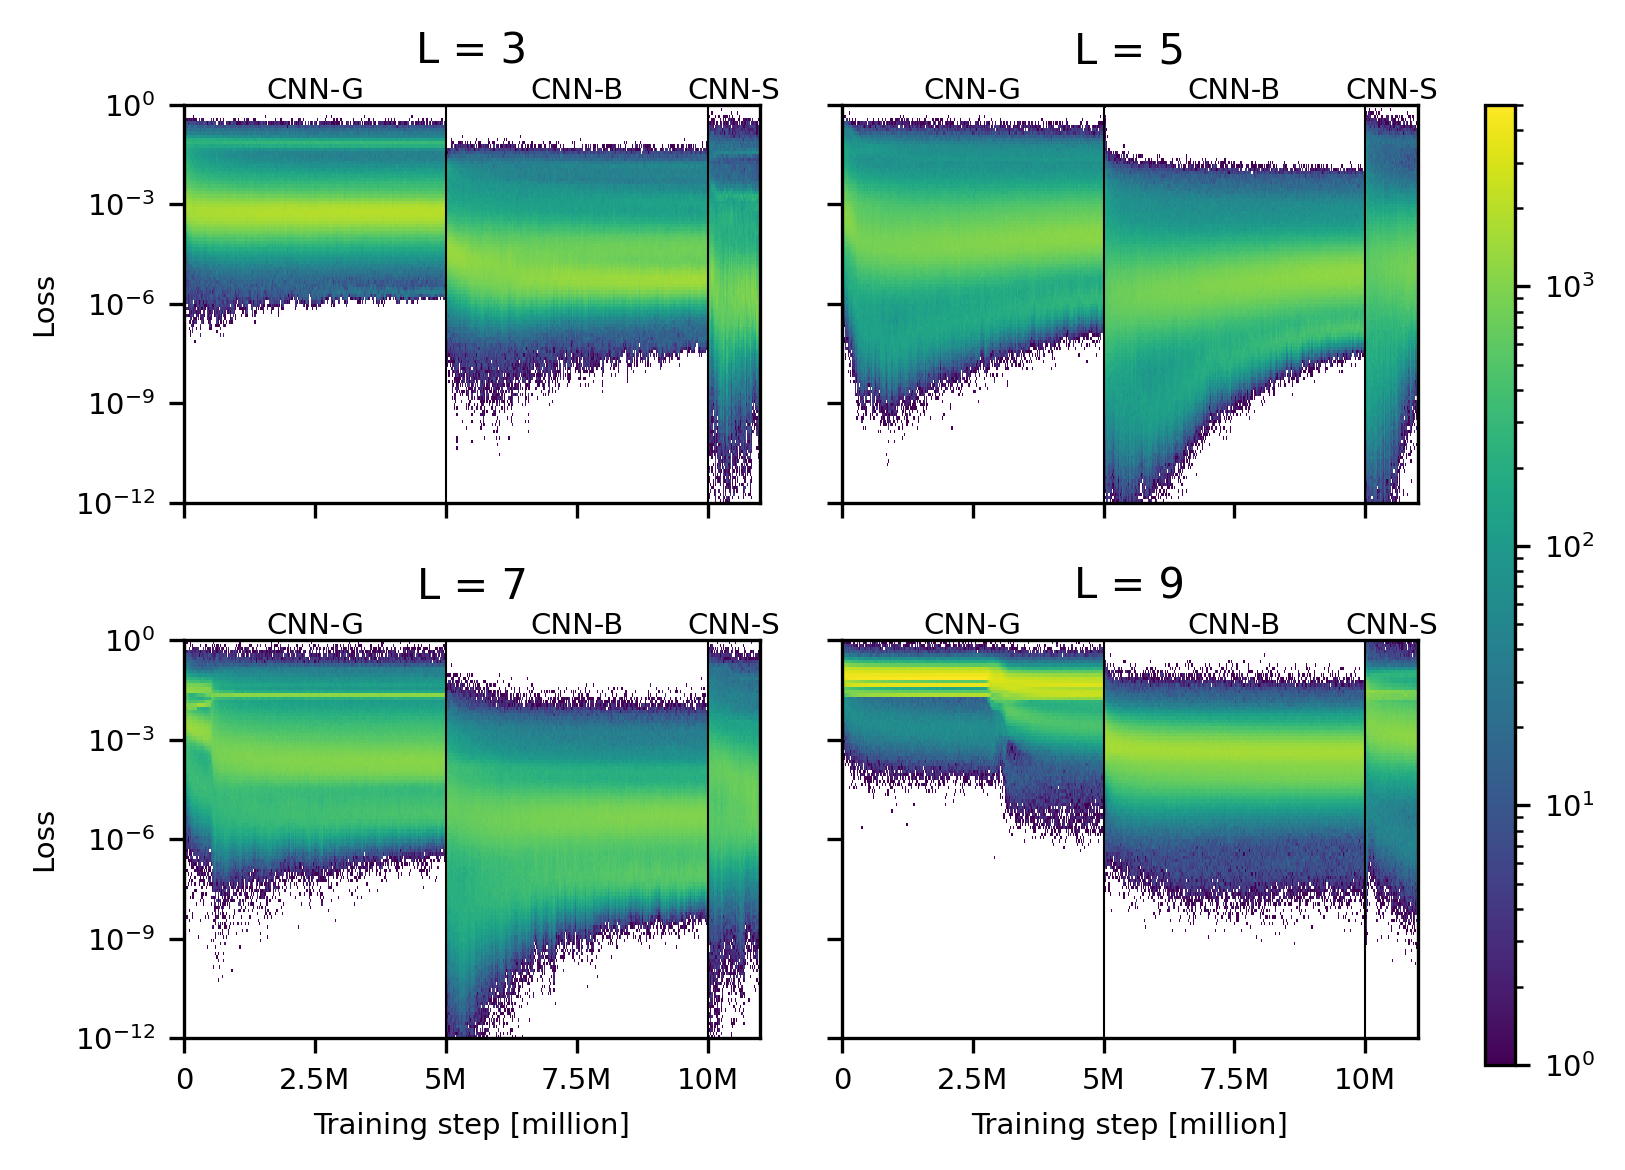

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(5, 4), sharex=True, sharey=True, dpi=300)

for i, ax in enumerate(axes.flat):
    ax.hist2d(
        x=jnp.arange(losses[i].shape[0]), 
        y=losses[i], 
        bins=[
            jnp.linspace(0, losses[i].shape[0], 500),
            jnp.logspace(-12, 0, 121),
        ],
        norm=LogNorm(vmin=1, vmax=5E3),
    )
    ax.axvline(x=5e6, color='k', linestyle='-', label='5M', lw=.5)
    ax.axvline(x=10e6, color='k', linestyle='-', label='10M', lw=.5)
    ax.text(2.5e6,  1E-0, 'CNN-G', ha='center', va='bottom', fontsize=7, color='k')
    ax.text(7.5e6,  1E-0, 'CNN-B', ha='center', va='bottom', fontsize=7, color='k')
    ax.text(10.5e6, 1E-0, 'CNN-S', ha='center', va='bottom', fontsize=7, color='k')
    ax.set_yscale('log')
    ax.set_yticks([1E-12, 1E-9, 1E-6, 1E-3, 1E0])
    ax.set_xticks([0, 2.5e6, 5e6, 7.5e6, 10e6])
    ax.set_xticklabels(['0', '2.5M', '5M', '7.5M', '10M'])
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.set_title(f'L = {2*i+3}', fontsize=10, pad=10)
    if i % 2 == 0:
        ax.set_ylabel('Loss', fontsize=7)
    if i >= 2:
        ax.set_xlabel('Training step [million]', fontsize=7)

cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.8])  # Add a new axis for the colorbar
cbar = fig.colorbar(ax.collections[0], cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=7)
# cbar.set_label('Loss density', fontsize=8)

plt.tight_layout()

plt.savefig('figs/losses-probdist-method.eps', bbox_inches='tight', dpi=300)
plt.savefig('figs/losses-probdist-method.pdf', bbox_inches='tight', dpi=300)
plt.savefig('figs/losses-probdist-method.png', bbox_inches='tight', dpi=300)

plt.show()